# Análise Estatística de Dados e Informações
**PPCA/UNB**

---

**Tarefa 04**  
**Professor**: João Gabriel de Moraes Sousa  
**Aluna**: Andreia Queiroz Correia Dummar  
**Matrícula**: 241134680  
**Data da Entrega**: 19/01/2025  
**Github**: https://github.com/aqcorreia/AEDI/tree/f3c468ca71fd3b570f72f01c282e70c6d270c5d7/Tarefa06

---

**Aplicação**: Ciência de Dados (Modelos supervisionados)

**Dados**: Customer Personality Analysis (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv)

---

**ATRIBUTOS**

## Clientes
- `ID`: Customer's unique identifier  
- `Year_Birth`: Customer's birth year  
- `Education`: Customer's education level  
- `Marital_Status`: Customer's marital status  
- `Income`: Customer's yearly household income  
- `Kidhome`: Number of children in customer's household  
- `Teenhome`: Number of teenagers in customer's household  
- `Dt_Customer`: Date of customer's enrollment with the company  
- `Recency`: Number of days since customer's last purchase  
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise  

## Produtos
- `MntWines`: Amount spent on wine in last 2 years  
- `MntFruits`: Amount spent on fruits in last 2 years  
- `MntMeatProducts`: Amount spent on meat in last 2 years  
- `MntFishProducts`: Amount spent on fish in last 2 years  
- `MntSweetProducts`: Amount spent on sweets in last 2 years  
- `MntGoldProds`: Amount spent on gold in last 2 years  

## Promoções
- `NumDealsPurchases`: Number of purchases made with a discount  
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise  

## Canais de compra
- `NumWebPurchases`: Number of purchases made through the company’s website  
- `NumCatalogPurchases`: Number of purchases made using a catalogue  
- `NumStorePurchases`: Number of purchases made directly in stores  
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month  

---


## a) Discussão sobre o problema apresentado

O problema das queixas dos consumidores é crucial para o entendimento de possíveis lacunas na experiência do cliente e seus impactos no desempenho da empresa. A análise dos dados disponíveis pode revelar padrões de insatisfação relacionados a características demográficas (como idade e renda), comportamento de compra (como frequência de compras e preferências de produtos) e interações com a empresa (como canais utilizados e aceitação de campanhas). Ao cruzar a variável **"Complain"** com outras métricas, como **Recency** (tempo desde a última compra) e os montantes gastos em diferentes categorias de produtos, a empresa pode identificar fatores que contribuem para a insatisfação e traçar estratégias para mitigar esses problemas.

Compreender as causas das queixas permite à empresa melhorar a experiência do cliente, reduzir a perda de consumidores e aumentar a fidelidade. Essa análise contribui para fortalecer a reputação da marca, melhorar a retenção de clientes e impulsionar resultados financeiros sustentáveis.

---



## 1) Bibliotecas

In [1]:
# --- Bibliotecas para manipulação e análise de dados ---
import pandas as pd
import numpy as np
from datetime import datetime

# --- Biblioteca para visualização ---
import matplotlib.pyplot as plt

# --- Bibliotecas para pré-processamento de dados ---
from sklearn.preprocessing import MinMaxScaler

# --- Bibliotecas para modelagem e avaliação ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

# --- Bibliotecas para algoritmos e visualização de modelos ---
from xgboost import XGBClassifier, plot_importance

# --- Biblioteca para balanceamento de dados ---
from imblearn.over_sampling import SMOTE

from sklearn.metrics import average_precision_score


## 2) Funções

In [2]:
def normalizar_colunas(dataframe, colunas):
    """
    Normaliza as colunas especificadas em um DataFrame usando o escalonamento Min-Max.

    Args:
        dataframe (pd.DataFrame): DataFrame a ser transformado.
        colunas (list): Lista de colunas a serem normalizadas.

    Returns:
        pd.DataFrame: DataFrame com as colunas normalizadas.
    """
    scaler = MinMaxScaler()
    dataframe[colunas] = scaler.fit_transform(dataframe[colunas])
    return dataframe

In [3]:
def calcular_valores_distintos(dataframe, coluna):
    """
    Calcula os valores distintos e suas contagens em uma coluna específica de um DataFrame.

    Parâmetros:
        dataframe (pd.DataFrame): O DataFrame que contém a coluna.
        coluna (str): O nome da coluna para análise.

    Retorna:
        pd.DataFrame: DataFrame com os valores distintos e suas contagens.
    """
    # Calcular os valores distintos e suas contagens
    distinct_values = dataframe[coluna].value_counts().reset_index()
    
    # Renomear as colunas do DataFrame resultante
    distinct_values.columns = [coluna, 'Count']
    
    return distinct_values


## 3) Leitura do arquivo de dados

In [4]:
diretorio = './dados'
marketing_campaign_data = pd.read_csv(f'{diretorio}/marketing_campaign.csv', delimiter='\t')

marketing_campaign_data.shape

(2240, 29)

In [5]:
marketing_campaign_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
marketing_campaign_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
marketing_campaign_data.shape

(2240, 29)

---
## 4) Análise descritiva e preparação dos dados

---

### 4.1) Análise dos valores faltantes

In [8]:
# Função para verificar valores faltantes
def check_missing_values(dataframe):
    total_missing = dataframe.isnull().sum()
    percent_missing = (total_missing / len(dataframe)) * 100
    missing_summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Total Missing': total_missing,
        'Percent Missing': percent_missing
    })
    return missing_summary[missing_summary['Total Missing'] > 0]

# Chamar a função
missing_summary = check_missing_values(marketing_campaign_data)

# Exibir o resultado
if not missing_summary.empty:
    print("=== Valores Faltantes ===")
    print(missing_summary.to_string(index=False))
else:
    print("Não há valores faltantes no DataFrame.")

=== Valores Faltantes ===
Column  Total Missing  Percent Missing
Income             24         1.071429


In [9]:
calcular_valores_distintos(marketing_campaign_data, 'Complain')

,Complain,Count
0,0,2219
1,1,21


In [10]:
missing_income_complain = marketing_campaign_data.loc[
    marketing_campaign_data['Income'].isnull(), ['Complain']
].reset_index(drop=True)


calcular_valores_distintos(missing_income_complain, 'Complain')

,Complain,Count
0,0,24


In [11]:
marketing_campaign_data01 = marketing_campaign_data.dropna().copy()
marketing_campaign_data01.shape

(2216, 29)

In [12]:
calcular_valores_distintos(marketing_campaign_data01, 'Complain')

,Complain,Count
0,0,2195
1,1,21


### 4.2) Análise dos dados dos clientes ('ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain')

In [13]:
marketing_campaign_data_tmp = marketing_campaign_data01[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']].copy()

In [14]:
# Convertendo a coluna Dt_Customer para o formato datetime
marketing_campaign_data_tmp['Dt_Customer'] = pd.to_datetime(marketing_campaign_data_tmp['Dt_Customer'], dayfirst=True)

# Calculando a quantidade de dias desde a adesão
data_atual = datetime.now()
marketing_campaign_data_tmp['Days_Since_Enrollment'] = (data_atual - marketing_campaign_data_tmp['Dt_Customer']).dt.days

# Calculando o ano atual
ano_atual = data_atual.year

# Criando a coluna Age com a idade
marketing_campaign_data_tmp['Age'] = ano_atual - marketing_campaign_data_tmp['Year_Birth']

marketing_campaign_data_tmp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Days_Since_Enrollment,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,0,4520,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,0,3970,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,0,4169,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,0,3996,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,0,4018,44


In [15]:
marketing_campaign_data_tmp.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Days_Since_Enrollment,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,0.009477,4210.521209,56.179603
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,3857.000000,29.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,0.000000,4037.000000,48.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,0.000000,4212.500000,55.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,0.000000,4386.000000,66.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.000000,4556.000000,132.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,0.096907,202.434667,11.985554


In [16]:
# Selecionando as colunas a serem normalizadas
colunas_para_normalizar = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Days_Since_Enrollment', 'Age']
marketing_campaign_data_tmp = normalizar_colunas(marketing_campaign_data_tmp, colunas_para_normalizar)

marketing_campaign_data_tmp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Days_Since_Enrollment,Age
0,5524,1957,Graduation,Single,0.084832,0.0,0.0,2012-09-04,0.585859,0,0.948498,0.378641
1,2174,1954,Graduation,Single,0.067095,0.5,0.5,2014-03-08,0.383838,0,0.161660,0.407767
2,4141,1965,Graduation,Together,0.105097,0.0,0.0,2013-08-21,0.262626,0,0.446352,0.300971
3,6182,1984,Graduation,Together,0.037471,0.5,0.0,2014-02-10,0.262626,0,0.198856,0.116505
4,5324,1981,PhD,Married,0.085065,0.5,0.0,2014-01-19,0.949495,0,0.230329,0.145631


In [17]:
# Tratamento de colunas categóricas com one-hot encoding
marketing_campaign_data_people = pd.get_dummies(marketing_campaign_data_tmp, columns=['Education', 'Marital_Status'], drop_first=True)

marketing_campaign_data_people.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Days_Since_Enrollment,Age,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,0.084832,0.0,0.0,2012-09-04,0.585859,0,0.948498,0.378641,...,True,False,False,False,False,False,True,False,False,False
1,2174,1954,0.067095,0.5,0.5,2014-03-08,0.383838,0,0.161660,0.407767,...,True,False,False,False,False,False,True,False,False,False
2,4141,1965,0.105097,0.0,0.0,2013-08-21,0.262626,0,0.446352,0.300971,...,True,False,False,False,False,False,False,True,False,False
3,6182,1984,0.037471,0.5,0.0,2014-02-10,0.262626,0,0.198856,0.116505,...,True,False,False,False,False,False,False,True,False,False
4,5324,1981,0.085065,0.5,0.0,2014-01-19,0.949495,0,0.230329,0.145631,...,False,False,True,False,False,True,False,False,False,False


In [18]:
print(marketing_campaign_data_tmp.shape)

print(marketing_campaign_data_people.shape)


(2216, 12)
(2216, 21)


In [19]:
# Removendo as colunas Year_Birth e Dt_Customer
marketing_campaign_data_people.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True)

print(marketing_campaign_data_people.shape)


(2216, 19)


In [20]:
marketing_campaign_data_people.head()

,ID,Income,Kidhome,Teenhome,Recency,Complain,Days_Since_Enrollment,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,0.084832,0.0,0.0,0.585859,0,0.948498,0.378641,False,True,False,False,False,False,False,True,False,False,False
1,2174,0.067095,0.5,0.5,0.383838,0,0.161660,0.407767,False,True,False,False,False,False,False,True,False,False,False
2,4141,0.105097,0.0,0.0,0.262626,0,0.446352,0.300971,False,True,False,False,False,False,False,False,True,False,False
3,6182,0.037471,0.5,0.0,0.262626,0,0.198856,0.116505,False,True,False,False,False,False,False,False,True,False,False
4,5324,0.085065,0.5,0.0,0.949495,0,0.230329,0.145631,False,False,False,True,False,False,True,False,False,False,False


### 4.3) Análise dos dados dos produtos ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')

In [21]:
marketing_campaign_data_tmp = marketing_campaign_data01[['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].copy()

In [22]:
marketing_campaign_data_tmp.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [23]:
marketing_campaign_data_tmp.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,3249.376275,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,8421.750000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,11191.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [24]:
# Selecionando as colunas a serem normalizadas
colunas_para_normalizar = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
marketing_campaign_data_products = normalizar_colunas(marketing_campaign_data_tmp, colunas_para_normalizar)

marketing_campaign_data_products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143
1,2174,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692
2,4141,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841
3,6182,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576
4,5324,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729


### 4.4) Análise dos dados das promoções ('NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response')

In [25]:
marketing_campaign_data_tmp = marketing_campaign_data01[['ID', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].copy()

In [26]:
marketing_campaign_data_tmp.head()

,ID,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,3,0,0,0,0,0,1
1,2174,2,0,0,0,0,0,0
2,4141,1,0,0,0,0,0,0
3,6182,2,0,0,0,0,0,0
4,5324,5,0,0,0,0,0,0


In [27]:
marketing_campaign_data_tmp.describe()

,ID,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,2.323556,0.064079,0.013538,0.073556,0.074007,0.073105,0.150271
std,3249.376275,1.923716,0.244950,0.115588,0.261106,0.261842,0.260367,0.357417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Selecionando as colunas a serem normalizadas
colunas_para_normalizar = ['NumDealsPurchases']
marketing_campaign_data_promotion = normalizar_colunas(marketing_campaign_data_tmp, colunas_para_normalizar)

marketing_campaign_data_promotion.head()

,ID,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,0.200000,0,0,0,0,0,1
1,2174,0.133333,0,0,0,0,0,0
2,4141,0.066667,0,0,0,0,0,0
3,6182,0.133333,0,0,0,0,0,0
4,5324,0.333333,0,0,0,0,0,0


### 4.5) Análise dos dados da loja ('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth')

In [29]:
marketing_campaign_data_tmp = marketing_campaign_data01[['ID', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].copy()

In [30]:
marketing_campaign_data_tmp.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,8,10,4,7
1,2174,1,1,2,5
2,4141,8,2,10,4
3,6182,2,0,4,6
4,5324,5,3,6,5


In [31]:
marketing_campaign_data_tmp.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,4.085289,2.671029,5.800993,5.319043
std,3249.376275,2.740951,2.926734,3.250785,2.425359
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,4.000000,2.000000,5.000000,6.000000
75%,8421.750000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,27.000000,28.000000,13.000000,20.000000


In [32]:
# Selecionando as colunas a serem normalizadas
colunas_para_normalizar = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
marketing_campaign_data_place= normalizar_colunas(marketing_campaign_data_tmp, colunas_para_normalizar)

marketing_campaign_data_place.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,0.296296,0.357143,0.307692,0.35
1,2174,0.037037,0.035714,0.153846,0.25
2,4141,0.296296,0.071429,0.769231,0.20
3,6182,0.074074,0.000000,0.307692,0.30
4,5324,0.185185,0.107143,0.461538,0.25


### 4.6) Consolida os dataframes e um único

In [33]:
marketing_campaign_data_full = marketing_campaign_data_people
marketing_campaign_data_full = marketing_campaign_data_full.merge(marketing_campaign_data_products, on='ID', how='outer')
marketing_campaign_data_full = marketing_campaign_data_full.merge(marketing_campaign_data_promotion, on='ID', how='outer')
marketing_campaign_data_full = marketing_campaign_data_full.merge(marketing_campaign_data_place, on='ID', how='outer')

print(marketing_campaign_data_full.shape)

(2216, 36)


In [34]:
marketing_campaign_data_full.head()

,ID,Income,Kidhome,Teenhome,Recency,Complain,Days_Since_Enrollment,Age,Education_Basic,Education_Graduation,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,0.104102,0.0,0.0,0.666667,0,0.602289,0.106796,False,True,...,0,0,0,0,0,0,0.111111,0.142857,0.692308,0.05
1,1,0.083258,0.0,0.0,0.000000,0,0.020029,0.339806,False,True,...,0,1,0,0,0,1,0.259259,0.107143,0.538462,0.25
2,9,0.066725,0.5,0.5,0.868687,0,0.972818,0.203883,False,False,...,0,0,0,0,0,0,0.111111,0.071429,0.153846,0.40
3,13,0.035534,0.0,0.5,0.575758,0,0.489270,0.475728,False,False,...,0,0,0,0,0,0,0.037037,0.000000,0.230769,0.30
4,17,0.088371,0.0,0.5,0.818182,0,0.423462,0.242718,False,False,...,0,0,0,0,0,0,0.222222,0.392857,0.538462,0.25


In [35]:
marketing_campaign_data_full.describe()

,ID,Income,Kidhome,Teenhome,Recency,Complain,Days_Since_Enrollment,Age,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,0.075973,0.220894,0.252708,0.495077,0.009477,0.505753,0.263880,0.204348,0.132442,...,0.064079,0.013538,0.073556,0.074007,0.073105,0.150271,0.151307,0.095394,0.446230,0.265952
std,3249.376275,0.037858,0.268448,0.272091,0.292408,0.096907,0.289606,0.116365,0.225940,0.199969,...,0.244950,0.115588,0.261106,0.261842,0.260367,0.357417,0.101517,0.104526,0.250060,0.121268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,0.050491,0.000000,0.000000,0.242424,0.000000,0.257511,0.184466,0.016075,0.010050,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.230769,0.150000
50%,5458.500000,0.074671,0.000000,0.000000,0.494949,0.000000,0.508584,0.252427,0.116879,0.040201,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148148,0.071429,0.384615,0.300000
75%,8421.750000,0.100449,0.500000,0.500000,0.747475,0.000000,0.756795,0.359223,0.338245,0.165829,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.142857,0.615385,0.350000
max,11191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
marketing_campaign_data_full.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
       'Days_Since_Enrollment', 'Age', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [37]:
marketing_campaign_data_full['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

---

## b) Descrição dos dados

A base analisada contém 2.240 registros e 29 colunas. Desses, apenas 21 estão associados a reclamações, evidenciando uma quantidade muito baixa de ocorrências na classe positiva (**complain = 1**). Esse desbalanceamento torna a base um desafio significativo para a aplicação de técnicas preditivas. Foram encontrados 24 valores faltantes na coluna **Income**, todos pertencentes à classe negativa (**complain = 0**). Esses registros foram removidos, resultando em um DataFrame final com 2.216 registros, sendo 2.195 da classe **complain = 0** e apenas 21 da classe **complain = 1**, mantendo o desbalanceamento original.

Para facilitar as análises e modelagem, as colunas foram agrupadas em categorias relevantes:
- **Clientes** (`ID`, `Year_Birth`, `Education`, `Marital_Status`, `Income`, `Kidhome`, `Teenhome`, `Dt_Customer`, `Recency`, `Complain`): relacionadas ao perfil demográfico e histórico do cliente;
- **Produtos** (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`): contendo informações sobre gastos em diferentes categorias de produtos;
- **Promoções** (`NumDealsPurchases`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response`): abordando campanhas e promoções aceitas;
- **Canais de compra** (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`): com dados sobre os canais de compra e visitas realizadas.

Na etapa de preparação dos dados, foram realizadas as seguintes transformações:
- **Clientes**: foram criadas as variáveis `Age`, a partir de `Year_Birth`, e `Days_Since_Enrollment`, com base em `Dt_Customer`, para representar a idade e o tempo de adesão dos clientes. As colunas categóricas `Education` e `Marital_Status` foram convertidas em representações binárias para viablizar sua utilização em modelos preditivos. As colunas numéricas `Income`, `Kidhome`, `Teenhome`, `Recency`, `Days_Since_Enrollment` e `Age` foram normalizadas para padronizar os valores e equilibrar sua influência nos modelos.
- **Produtos**: As colunas numéricas `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` foram normalizadas.
- **Promoções**: A coluna numérica `NumDealsPurchases` foi normalizada.
- **Canais de compra**: As colunas numéricas `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`] foram normalizadas.

---



---

## 5) Predição de reclamações com técnicas de modelagem supervisionada

---

## c) Definição e Seleção de Modelos

Para prever o registro de queixas pelos consumidores em um cenário de classes desbalanceadas, foram utilizados os modelos **RandomForestClassifier** e **XGBoost** devido às suas características complementares, com o objetivo de avaliar qual seria o mais adequado para o caso em análise. O **RandomForestClassifier** é robusto contra overfitting, fornece insights sobre a importância das variáveis e é eficiente em problemas gerais de classificação. O **XGBoost**, por sua vez, é altamente eficiente para capturar padrões complexos, com capacidade de ajuste para lidar diretamente com o desbalanceamento, como o uso do hiperparâmetro `scale_pos_weight`.

Além disso, o **SMOTE (Synthetic Minority Oversampling Technique)** foi empregado para balancear as classes, criando amostras sintéticas da classe minoritária (queixas), melhorando a capacidade dos modelos de identificar padrões associados a essa classe. Essa abordagem reduz o viés para a classe majoritária e melhora métricas como **F1-score**, **AUC-ROC** e **Precision-Recall Curve**, que são essenciais para avaliar o desempenho em dados desbalanceados. A **Precision-Recall Curve** foi utilizada para analisar o trade-off entre precisão e recall, com o cálculo do **Average Precision-Recall Score**, oferecendo uma visão detalhada do desempenho dos modelos no cenário de desbalanceamento.

Para o caso do **XGBoost**, o modelo foi também executado, desconsiderando as variáveis não relevantes.

---

#### 4.7.1) Modelo treinado com RandomForestClassifier

Relatório de Classificação com Limite Ajustado (Árvore de decisão):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       659
           1       0.50      0.17      0.25         6

    accuracy                           0.99       665
   macro avg       0.75      0.58      0.62       665
weighted avg       0.99      0.99      0.99       665

AUC-ROC Score: 0.7697268588770865


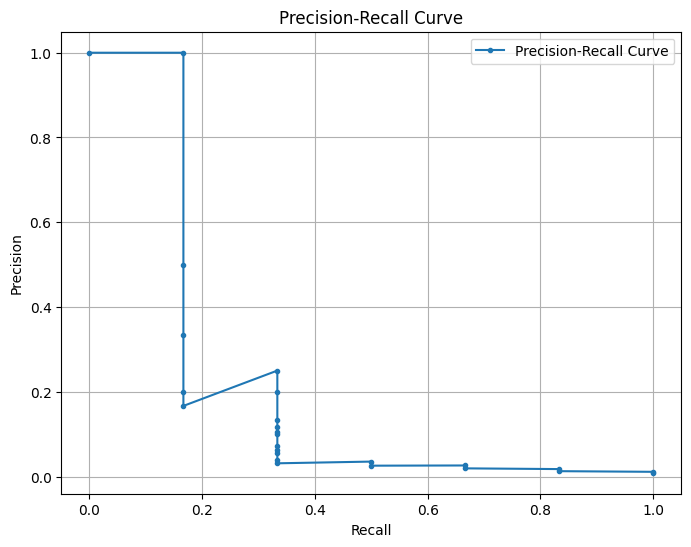

Average Precision-Recall Score: 0.22

Importância das features (Árvore de decisão):
                    Feature  Importance
24        NumDealsPurchases    0.102646
2                   Kidhome    0.097477
14    Marital_Status_Single    0.092400
8      Education_Graduation    0.061010
3                  Teenhome    0.060707
4                   Recency    0.050166
18                 MntWines    0.047309
22         MntSweetProducts    0.046414
5     Days_Since_Enrollment    0.037916
19                MntFruits    0.037441
34        NumWebVisitsMonth    0.035955
21          MntFishProducts    0.032741
13   Marital_Status_Married    0.032061
6                       Age    0.031731
15  Marital_Status_Together    0.031378
0                        ID    0.030437
31          NumWebPurchases    0.029488
20          MntMeatProducts    0.026624
32      NumCatalogPurchases    0.025363
23             MntGoldProds    0.021657
1                    Income    0.020518
33        NumStorePurchases    0.017

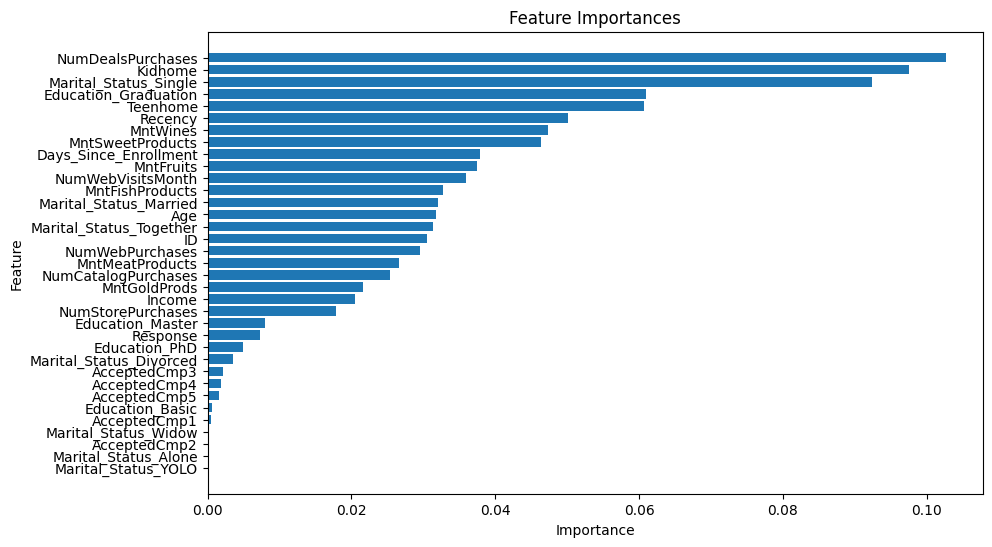

In [38]:
# X contém as features, y contém a variável alvo
X = marketing_campaign_data_full.drop('Complain', axis=1)
y = marketing_campaign_data_full['Complain']

# 2. Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Aplicar SMOTE para balancear os dados
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4. Treinar o modelo com pesos balanceados
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

# 5. Fazer previsões no conjunto de teste (probabilidades)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe 1

# 6. Ajustar o threshold de decisão
threshold = 0.28  # Ajustar o threshold para priorizar o recall da classe minoritária
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# 7. Avaliar o modelo com métricas ajustadas
print("Relatório de Classificação com Limite Ajustado (Árvore de decisão):\n", classification_report(y_test, y_pred_adjusted, zero_division=0))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

# 8. Calcular e plotar a Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot da Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# 9. Calcular o Average Precision-Recall Score corretamente
average_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision-Recall Score: {average_precision:.2f}")

# 10. Exibir a importância das features
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nImportância das features (Árvore de decisão):")
print(feature_importance_df)

# 11. Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Inverter para exibir a mais importante no topo
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


#### 4.7.2) Modelo treinado com XGBoost (balanceamento com SMOTE)

Relatório de Classificação com Limite Ajustado (XGBoost) - com balanceamento com SMOTE:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       659
           1       0.40      0.33      0.36         6

    accuracy                           0.99       665
   macro avg       0.70      0.66      0.68       665
weighted avg       0.99      0.99      0.99       665

AUC-ROC Score: 0.7541729893778452


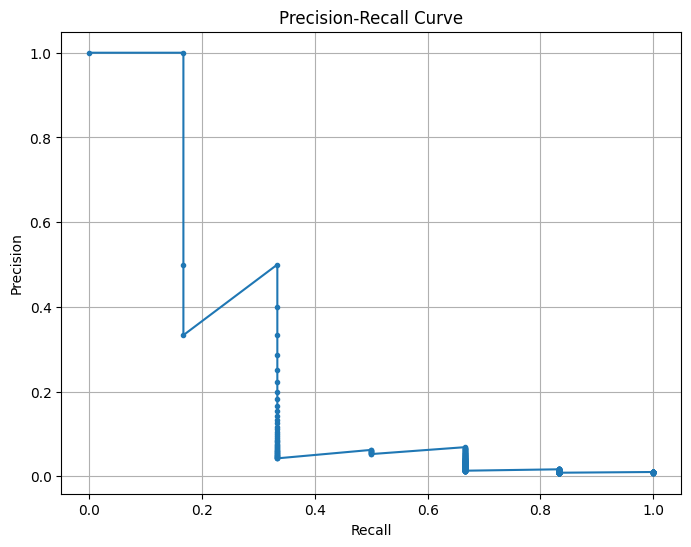

Average Precision-Recall Score: 0.2764

Importância das Features:
                    Feature  Importance
7           Education_Basic    0.163292
28             AcceptedCmp4    0.097726
18                 MntWines    0.074007
30                 Response    0.070073
27             AcceptedCmp3    0.069553
24        NumDealsPurchases    0.052941
14    Marital_Status_Single    0.051892
5     Days_Since_Enrollment    0.048843
4                   Recency    0.035829
23             MntGoldProds    0.034345
10            Education_PhD    0.033409
19                MntFruits    0.031073
21          MntFishProducts    0.029173
22         MntSweetProducts    0.028993
6                       Age    0.021650
0                        ID    0.021413
2                   Kidhome    0.017039
20          MntMeatProducts    0.016848
31          NumWebPurchases    0.015364
12  Marital_Status_Divorced    0.013064
8      Education_Graduation    0.012958
34        NumWebVisitsMonth    0.012067
1             

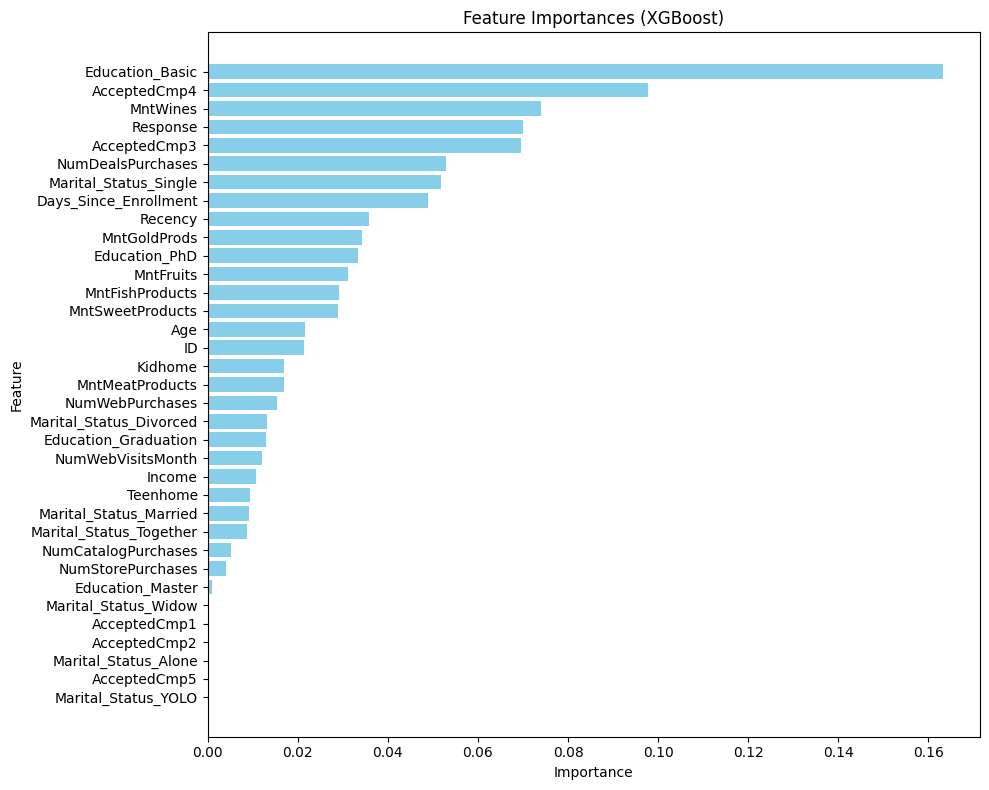

In [39]:
# 1. Preparar os dados
X = marketing_campaign_data_full.drop('Complain', axis=1)
y = marketing_campaign_data_full['Complain']

# 2. Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Balanceamento dos dados com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4. Treinar o modelo com XGBoost
# Ajustar scale_pos_weight para lidar com o desbalanceamento
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

model = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'  # Remove warnings de logs desatualizados
)

# Treinamento
model.fit(X_train_bal, y_train_bal)

# 5. Fazer previsões no conjunto de teste
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe 1

# Ajustar o threshold de decisão
threshold = 0.28  # Ajuste do threshold para aumentar recall
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# 6. Avaliar o modelo
print("Relatório de Classificação com Limite Ajustado (XGBoost) - com balanceamento com SMOTE:\n", classification_report(y_test, y_pred_adjusted, zero_division=0))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

# 7. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# 8. Average Precision-Recall Score
avg_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision-Recall Score: {avg_precision:.4f}")

# 9. Avaliar a importância das características
# Obter a importância das características
importance = model.feature_importances_

# Criar um DataFrame para visualizar a importância
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Exibir a tabela de importâncias
print("\nImportância das Features:")
print(feature_importance_df)

# 10. Visualizar a importância das características
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Mostrar a mais importante no topo
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


#### 4.7.3) Modelo treinado com XGBoost (sem o balanceamento co SMOTE)

Relatório de Classificação com Limite Ajustado (XGBoost)  - SEM balanceamento com SMOTE:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       659
           1       1.00      0.17      0.29         6

    accuracy                           0.99       665
   macro avg       1.00      0.58      0.64       665
weighted avg       0.99      0.99      0.99       665

AUC-ROC Score: 0.6815882650480525


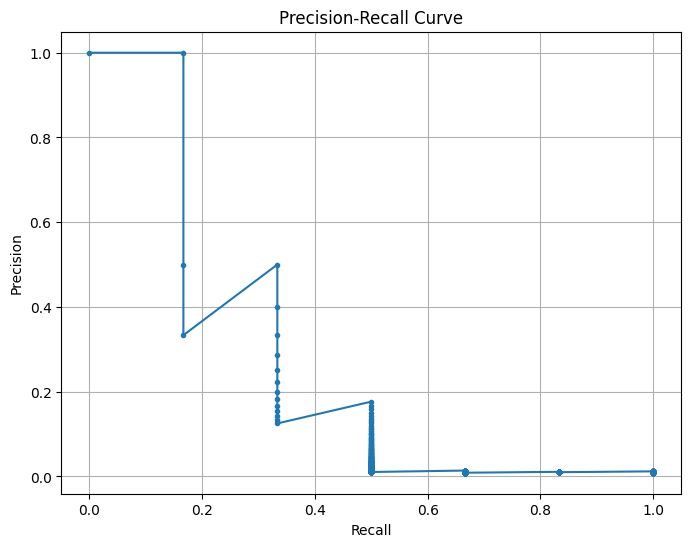

Average Precision-Recall Score: 0.2855

Importância das Features:
                    Feature  Importance
2                   Kidhome    0.109438
34        NumWebVisitsMonth    0.099728
18                 MntWines    0.092590
23             MntGoldProds    0.073555
5     Days_Since_Enrollment    0.070579
21          MntFishProducts    0.067539
3                  Teenhome    0.059642
24        NumDealsPurchases    0.052916
6                       Age    0.044288
4                   Recency    0.033084
14    Marital_Status_Single    0.032539
1                    Income    0.032338
8      Education_Graduation    0.028711
22         MntSweetProducts    0.027667
20          MntMeatProducts    0.023721
13   Marital_Status_Married    0.023461
32      NumCatalogPurchases    0.023058
0                        ID    0.018013
30                 Response    0.016562
15  Marital_Status_Together    0.015979
19                MntFruits    0.015634
31          NumWebPurchases    0.014160
12  Marital_St

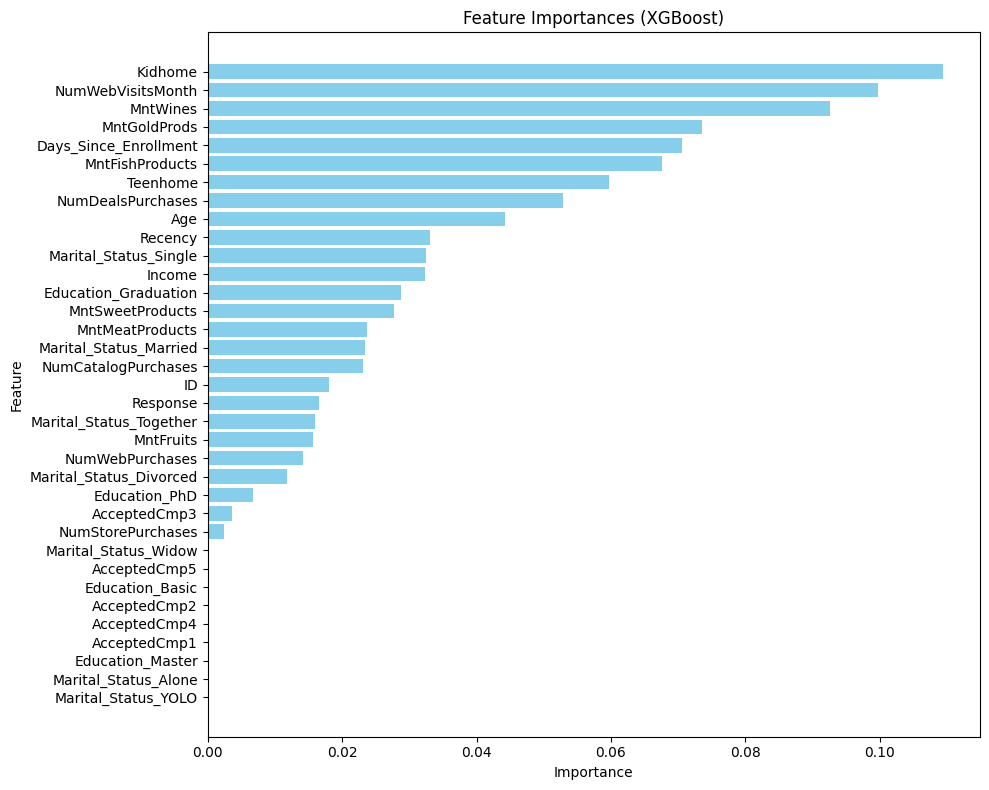

In [40]:
# 1. Preparação dos dados
X = marketing_campaign_data_full.drop('Complain', axis=1)
y = marketing_campaign_data_full['Complain']

# 2. Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Ajustar scale_pos_weight para lidar com o desbalanceamento
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

# 4. Treinar o modelo com XGBoost
model = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'  # Remove warnings de logs desatualizados
)

# Treinamento
model.fit(X_train, y_train)

# 5. Fazer previsões no conjunto de teste
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe 1

# Ajustar o threshold de decisão
threshold = 0.28  # Ajuste do threshold para aumentar recall
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# 6. Avaliar o modelo
print("Relatório de Classificação com Limite Ajustado (XGBoost)  - SEM balanceamento com SMOTE:\n", classification_report(y_test, y_pred_adjusted, zero_division=0))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

# 7. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# 8. Calcular o Average Precision-Recall Score
average_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision-Recall Score: {average_precision:.4f}")

# 9. Avaliar a importância das características
# Obter a importância das características
importance = model.feature_importances_

# Criar um DataFrame para visualizar a importância
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Exibir a tabela de importâncias
print("\nImportância das Features:")
print(feature_importance_df)

# 10. Visualizar a importância das características
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Mostrar a mais importante no topo
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


#### 4.7.4) Modelo treinado com XGBoost (remoção das features com baixa importância + balanceamento com SMOTE)

Relatório de Classificação com Limite Ajustado (XGBoost) - remoção de váriáveis não importantes + balanceamento com SMOTE:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       659
           1       0.29      0.33      0.31         6

    accuracy                           0.99       665
   macro avg       0.64      0.66      0.65       665
weighted avg       0.99      0.99      0.99       665

AUC-ROC Score: 0.7678300455235205


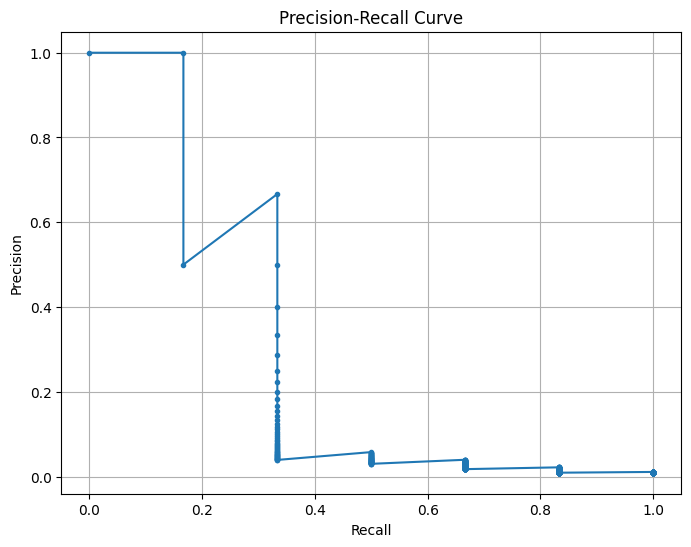

Average Precision-Recall Score: 0.2994
Feature Importances:
                     Feature  Importance
7           Education_Basic    0.165174
22             AcceptedCmp4    0.098852
14                 MntWines    0.074837
23                 Response    0.070881
21             AcceptedCmp3    0.070355
20        NumDealsPurchases    0.052834
12    Marital_Status_Single    0.050302
5     Days_Since_Enrollment    0.047094
19             MntGoldProds    0.036425
4                   Recency    0.036245
9             Education_PhD    0.033794
17          MntFishProducts    0.030106
15                MntFruits    0.029596
18         MntSweetProducts    0.029318
6                       Age    0.021897
0                        ID    0.020896
16          MntMeatProducts    0.017021
2                   Kidhome    0.016439
8      Education_Graduation    0.014793
24          NumWebPurchases    0.013464
27        NumWebVisitsMonth    0.011452
10  Marital_Status_Divorced    0.011361
1                  

<Figure size 1000x800 with 0 Axes>

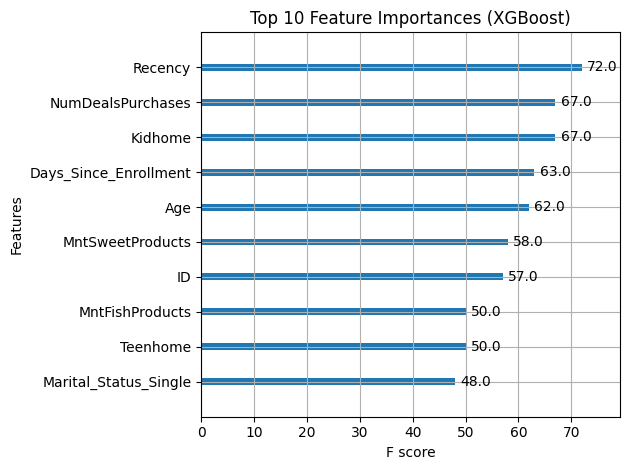

In [41]:
# 1. Remover variáveis irrelevantes
vars_to_remove = [
    "Marital_Status_Widow",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "Marital_Status_Alone",
    "AcceptedCmp5",
    "Marital_Status_YOLO",
    "Education_Master"
]

marketing_campaign_data_partial = marketing_campaign_data_full.drop(columns=vars_to_remove, errors="ignore")

# Separar as variáveis dependente e independentes
X = marketing_campaign_data_partial.drop('Complain', axis=1)
y = marketing_campaign_data_partial['Complain']

# 2. Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Aplicar SMOTE para balancear os dados
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4. Treinar o modelo com XGBoost
# Ajustar scale_pos_weight para lidar com o desbalanceamento
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

model = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'  # Remove warnings de logs desatualizados
)

# Treinamento
model.fit(X_train_bal, y_train_bal)

# 5. Fazer previsões no conjunto de teste
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe 1

# Ajustar o threshold de decisão
threshold = 0.28  # Ajuste do threshold para aumentar recall
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# 6. Avaliar o modelo
print("Relatório de Classificação com Limite Ajustado (XGBoost) - remoção de váriáveis não importantes + balanceamento com SMOTE:\n", classification_report(y_test, y_pred_adjusted, zero_division=0))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

# 7. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# 8. Calcular o Average Precision-Recall Score
average_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision-Recall Score: {average_precision:.4f}")

# 9. Avaliar a importância das características
# Obter a importância das características
importance = model.feature_importances_

# Criar um DataFrame para visualizar a importância
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

# 10. Visualizar a importância das características
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='weight', show_values=True)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


---

## d) Explicabilidade das variáveis principais

As variáveis mais importantes que influenciam o registro de queixas são: 

- **NumDealsPurchases (compras em promoção)**: Consumidores que realizam mais compras em promoção podem demonstrar maior sensibilidade a preços e possivelmente insatisfação quando suas expectativas em relação a promoções não são atendidas.

- **Kidhome (número de crianças em casa)**: Famílias com crianças apresentam padrões de consumo específicos, o que pode aumentar as queixas quando produtos ou serviços relacionados a esse público não correspondem às necessidades.

- **Marital_Status_Single (estado civil: solteiro)**: Consumidores solteiros tendem a apresentar padrões de consumo distintos, muitas vezes focados em conveniência e praticidade, o que pode influenciar a frequência de reclamações.

- **Education_Basic (educação básica)**: Consumidores com menor nível educacional podem ter mais dificuldades em entender termos promocionais ou comunicados complexos, o que pode contribuir para insatisfações.

- **Recency (tempo desde a última compra)**: Clientes que não compraram recentemente podem estar desengajados ou insatisfeitos, o que pode estar refletido em registros de queixas.

- **MntWines (gasto com vinhos)**: Consumidores que gastam mais em vinhos tendem a ter expectativas mais altas em relação à qualidade do produto, o que pode impactar o registro de reclamações quando essas expectativas não são atendidas.

- **AcceptedCmp4 (promoções específicas)**: Promoções como a **AcceptedCmp4** podem ser importantes para consumidores que valorizam campanhas específicas. Queixas podem surgir quando essas campanhas não atendem às suas expectativas.

- **Days_Since_Enrollment (dias desde o cadastro)**: Consumidores recém-cadastrados ou com muito tempo de inatividade podem estar mais propensos a registrar queixas, refletindo insatisfação inicial ou falta de engajamento.

---


## e) Recomendações para a Tomada de Decisão

---

#### **i) Resultados**

| **Aspecto**                       | **Árvore de Decisão**                                                                                     | **XGBoost (Todas as Variáveis e balanceamento com SMOTE)**                                    | **XGBoost (Todas as Variáveis, SEM balanceamento com SMOTE)**                           | **XGBoost (Variáveis Selecionadas  e balanceamento com SMOTE)**                               |
|-----------------------------------|-----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Desempenho Geral**              | Alta precisão para a classe 0, mas dificuldade em prever a classe 1.                                      | Melhor desempenho na classe 1, capturando mais padrões.                                      | Alta precisão geral, mas dificuldade em capturar corretamente a classe minoritária.          | Sem perda significativa de desempenho após remover variáveis de baixa importância.           |
| **Precision Classe 1**            | 0.50                                                                                                      | **0.40** – Melhor que o modelo com variáveis selecionadas, indicando maior foco em padrões complexos. | **1.00** – Muito alta, porém enganosa devido ao baixo recall.                                | 0.29                                                                                         |
| **Recall Classe 1**               | **0.17** – Muito baixo, indicando que poucas queixas foram corretamente identificadas.                                                                                                      | 0.33                                                                                         | **0.17** – Muito baixo, indicando que poucas queixas foram corretamente identificadas.       | 0.33                                                                                         |
| **AUC-ROC Score**                 | **0.7697** – Moderada capacidade de separar as classes.                                                   | **0.7542** – Desempenho ligeiramente inferior, mas ainda com boa separação entre as classes. | **0.6816** – Capacidade limitada de separação entre as classes.                              | **0.7678** – Similar à árvore de decisão, mostrando que a seleção de variáveis não prejudicou o desempenho. |
| **Average Precision-Recall Score**| **0.22** – O menor valor entre os modelos, demonstrando baixa capacidade de capturar padrões da classe minoritária (queixas).                                                                                                      | **0.2764** – Demonstrou capacidade superior de captura de padrões em dados desbalanceados.  | **0.2994** – Melhor resultado entre os modelos, mesmo sem SMOTE, mas com baixo recall.       | **0.2855** – Indicou boa eficiência após a seleção de variáveis.                             |
| **Variáveis Mais Importantes**    | **NumDealsPurchases**, **Kidhome**, **Marital_Status_Single**, **Education_Graduation**, **Teenhome**.     | **Education_Basic**, **AcceptedCmp4**, **MntWines**, **Response**, **AcceptedCmp3**.         | **Education_Basic**, **AcceptedCmp4**, **MntWines**, **Response**, **AcceptedCmp3**.         | **Education_Basic**, **AcceptedCmp4**, **MntWines**, **Response**, **AcceptedCmp3**.         |
| **Força**                         | Identifica variáveis importantes de forma clara; é fácil de interpretar.                                  | Melhor em capturar padrões complexos e identificar registros de queixas.                    | Lida bem com desbalanceamento ao ajustar pesos das classes.                                  | Mantém boa performance enquanto simplifica o modelo, tornando-o mais eficiente.              |
| **Limitação**                     | Baixa capacidade de capturar a classe minoritária (queixas).                                              | Maior complexidade e maior custo computacional em comparação à Árvore de Decisão.            | Baixo recall para a classe 1, limitando a identificação de registros minoritários.           | Não resolve completamente o problema da classe minoritária, mas mantém desempenho robusto.   |

---

**Conclusão**
- **Árvore de Decisão** teve o pior desempenho no **Average Precision-Recall Score**, reforçando sua limitação para cenários de classes desbalanceadas.
- **XGBoost com Todas as Variáveis e balanceamento com SMOTE** teve um equilíbrio melhor entre as métricas, demonstrando que a combinação de balanceamento SMOTE e ajuste de pesos oferece boa robustez.
- **XGBoost com Todas as Variáveis, sem balanceamento com SMOTE** obteve o maior **Average Precision-Recall Score** (0.2994), mas seu **recall** muito baixo para a classe 1 compromete a capacidade de identificar registros de queixas.
- **XGBoost com Variáveis Selecionadas  e balanceamento com SMOTE** manteve boa eficiência após a redução das variáveis, mostrando-se uma opção mais enxuta sem sacrificar o desempenho.

Com base nos resultados, o modelo **XGBoost com Todas as Variáveis e balanceamento com SMOTE** é o mais equilibrado, combinando boa precisão, recall e Average Precision-Recall Score. Embora o modelo sem o balanceamento com SMOTE tenha obtido o maior Average Precision-Recall Score, seu baixo recall compromete a identificação de queixas. Assim, a utilização de SMOTE e ajuste de pesos é a abordagem mais robusta para lidar com o desbalanceamento das classes.


### ii) Recomendações

1. **Foco em Promoções**:
   - Variáveis como **NumDealsPurchases (compras em promoção)** e **AcceptedCmp4 (promoções específicas)** destacam a importância das promoções no comportamento do consumidor. Garantir clareza nas condições e personalização pode reduzir queixas relacionadas.

2. **Segmentação por Perfil Familiar e Educacional**:
   - Variáveis como **Kidhome (número de crianças em casa)**, **Marital_Status_Single (estado civil: solteiro)**, e **Education_Basic (educação básica)** sugerem a necessidade de campanhas específicas para famílias, solteiros e consumidores com menor escolaridade, atendendo às suas demandas específicas.

3. **Reengajamento de Clientes Inativos**:
   - **Recency (tempo desde a última compra)** e **Days_Since_Enrollment (dias desde o cadastro)** indicam que consumidores inativos ou novos podem gerar reclamações. Estratégias de reengajamento e onboarding podem melhorar a experiência.

4. **Garantia de Qualidade em Produtos Premium**:
   - Variáveis como **MntWines (gasto com vinhos)** mostra que produtos premium estão associados a altas expectativas. Investir na qualidade pode reduzir insatisfações.

5. **Aprimoramento no Suporte ao Cliente**:
   - O desempenho limitado dos modelos para a classe minoritária (queixas) indica a necessidade de canais de suporte mais eficientes para resolver problemas antes de se tornarem reclamações.


